# Aziz Ben Jemia 
# 🎯 Customer Churn Prediction Project

## 📋 Project Overview

This project covers the following key topics:
- **Analyze customer behavior patterns** and identify churn risk factors
- **Build predictive models** using multiple machine learning algorithms
- **Interpret business metrics** and provide actionable insights
- **Create interactive dashboards** for stakeholder communication
- **Apply product analytics best practices** in a real-world scenario

## 🎯 Business Problem

Customer churn is a critical business metric that directly impacts revenue and growth. By predicting which customers are likely to leave, we can:
- Implement targeted retention strategies
- Reduce customer acquisition costs
- Improve customer lifetime value
- Enhance overall business performance

## 📊 Dataset Description

We'll analyze a comprehensive customer dataset containing:
- **Demographic features**: Age, Gender
- **Behavioral features**: Tenure, Usage Frequency, Support Calls
- **Financial features**: Payment Delay, Total Spend, Subscription Type
- **Operational features**: Contract Length, Last Interaction
- **Target variable**: Churn (0 = Stay, 1 = Leave)

---

## 🚀 Setup and Data Loading

In [ ]:
# Import essential libraries for data analysis and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Visualization settings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [ ]:
# Load the local customer churn dataset
df = pd.read_csv('customer_churn_dataset.csv')

print(f"📊 Dataset loaded successfully!")
print(f"📈 Shape: {df.shape}")
print(f"\n🔍 First few rows:")
df.head()

📊 Dataset loaded successfully!
📈 Shape: (64374, 12)

🔍 First few rows:


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


## 🔍 Exploratory Data Analysis (EDA)

In [ ]:
# Basic dataset information
print("📋 Dataset Information:")
print("=" * 50)
df.info()

print("\n📊 Statistical Summary:")
print("=" * 50)
df.describe()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB

📊 Statistical Summary:


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
# Check for missing values
print("🔍 Missing Values Analysis:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("\n✅ No missing values found in the dataset!")

🔍 Missing Values Analysis:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []

✅ No missing values found in the dataset!


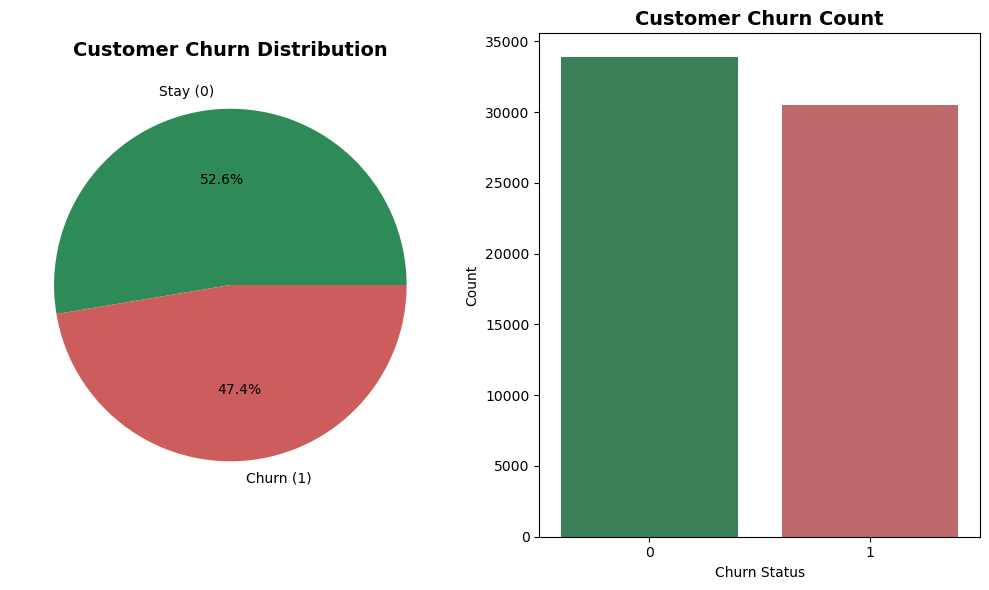

📊 Churn Rate: 47.37%
📊 Stay Rate: 52.63%


In [ ]:
# Target variable distribution
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
churn_counts = df['Churn'].value_counts()
colors = ['#2E8B57', '#CD5C5C']
plt.pie(churn_counts.values, labels=['Stay (0)', 'Churn (1)'], autopct='%1.1f%%', colors=colors)
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Churn', palette=['#2E8B57', '#CD5C5C'])
plt.title('Customer Churn Count', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print(f"📊 Churn Rate: {(churn_counts[1] / len(df)) * 100:.2f}%")
print(f"📊 Stay Rate: {(churn_counts[0] / len(df)) * 100:.2f}%")

## 🧹 Data Preprocessing

In [ ]:
# Remove CustomerID if it exists (not useful for prediction)
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)
    print("✅ CustomerID column removed")

# Handle missing values
if df.isnull().sum().sum() > 0:
    print("🔧 Handling missing values...")
    df = df.dropna()
    print(f"✅ Dataset shape after handling missing values: {df.shape}")

# Remove duplicates
initial_rows = len(df)
df = df.drop_duplicates()
final_rows = len(df)

if initial_rows != final_rows:
    print(f"✅ Removed {initial_rows - final_rows} duplicate rows")
else:
    print("✅ No duplicate rows found")

print(f"📊 Final dataset shape: {df.shape}")

✅ CustomerID column removed
✅ No duplicate rows found
📊 Final dataset shape: (64374, 11)


In [ ]:
# Encode categorical variables
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"🔤 Categorical features found: {categorical_features}")

if categorical_features:
    label_encoders = {}
    for feature in categorical_features:
        label_encoders[feature] = LabelEncoder()
        df[feature] = label_encoders[feature].fit_transform(df[feature])
        print(f"✅ Encoded {feature}")

print("\n📊 Dataset after encoding:")
df.head()

🔤 Categorical features found: ['Gender', 'Subscription Type', 'Contract Length']
✅ Encoded Gender
✅ Encoded Subscription Type
✅ Encoded Contract Length

📊 Dataset after encoding:


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0
3,35,1,9,12,5,17,1,2,232,18,0
4,53,0,58,24,9,2,2,0,533,18,0


## 📊 Feature Analysis and Visualization

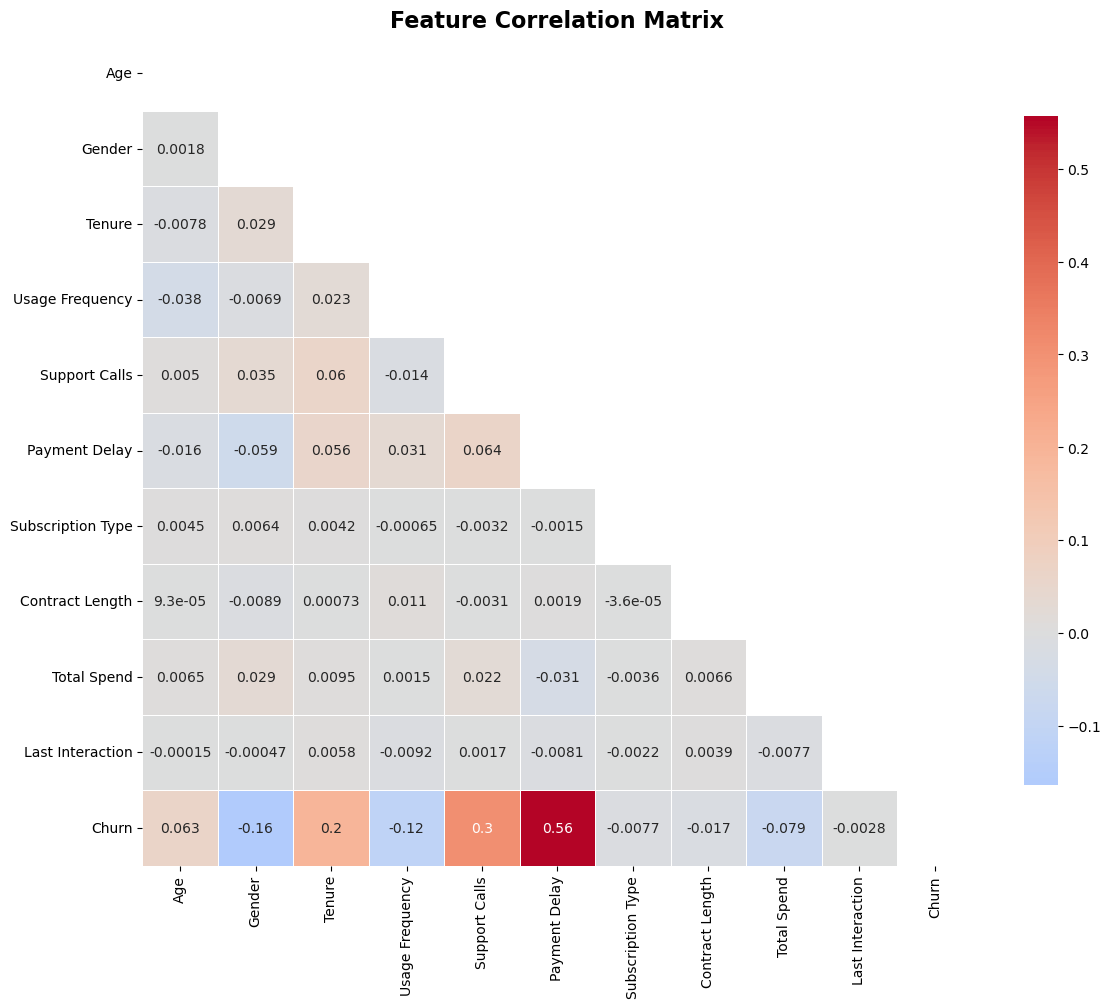

🔍 Top 10 features correlated with Churn:
Churn                1.000000
Payment Delay        0.557386
Support Calls        0.304631
Tenure               0.195327
Gender               0.164549
Usage Frequency      0.115098
Total Spend          0.078867
Age                  0.063457
Contract Length      0.017098
Subscription Type    0.007738
Name: Churn, dtype: float64


In [ ]:
# Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show top correlations with Churn
churn_correlations = correlation_matrix['Churn'].abs().sort_values(ascending=False)
print("🔍 Top 10 features correlated with Churn:")
print(churn_correlations.head(10))

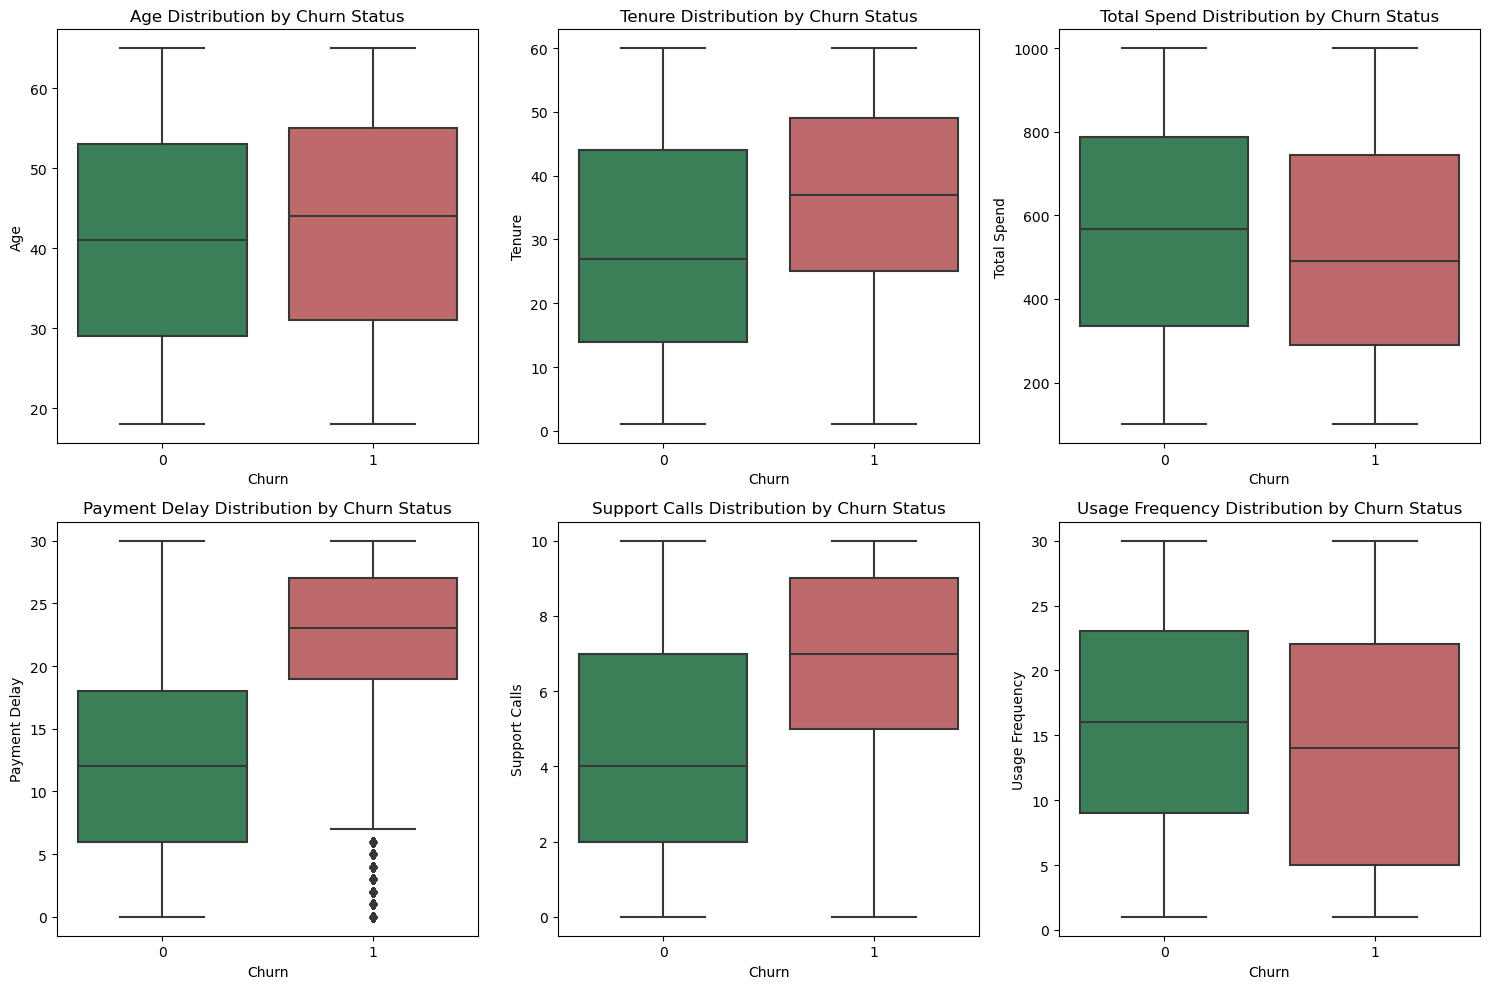

In [ ]:
# Feature importance analysis
plt.figure(figsize=(15, 10))

# Age vs Churn
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Churn', y='Age', palette=['#2E8B57', '#CD5C5C'])
plt.title('Age Distribution by Churn Status')

# Tenure vs Churn
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Churn', y='Tenure', palette=['#2E8B57', '#CD5C5C'])
plt.title('Tenure Distribution by Churn Status')

# Total Spend vs Churn
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Churn', y='Total Spend', palette=['#2E8B57', '#CD5C5C'])
plt.title('Total Spend Distribution by Churn Status')

# Payment Delay vs Churn
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Churn', y='Payment Delay', palette=['#2E8B57', '#CD5C5C'])
plt.title('Payment Delay Distribution by Churn Status')

# Support Calls vs Churn
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Churn', y='Support Calls', palette=['#2E8B57', '#CD5C5C'])
plt.title('Support Calls Distribution by Churn Status')

# Usage Frequency vs Churn
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='Churn', y='Usage Frequency', palette=['#2E8B57', '#CD5C5C'])
plt.title('Usage Frequency Distribution by Churn Status')

plt.tight_layout()
plt.show()

## 🤖 Machine Learning Model Development

In [ ]:
# Prepare features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"📊 Features shape: {X.shape}")
print(f"📊 Target shape: {y.shape}")
print(f"\n🔍 Feature names: {list(X.columns)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n📊 Training set: {X_train.shape[0]} samples")
print(f"📊 Test set: {X_test.shape[0]} samples")
print(f"📊 Training set churn rate: {y_train.mean():.3f}")
print(f"📊 Test set churn rate: {y_test.mean():.3f}")

📊 Features shape: (64374, 10)
📊 Target shape: (64374,)

🔍 Feature names: ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']

📊 Training set: 51499 samples
📊 Test set: 12875 samples
📊 Training set churn rate: 0.474
📊 Test set churn rate: 0.474


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled successfully!")

✅ Features scaled successfully!


In [ ]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Evaluate all models
results = []

for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    
    # Train model
    if name in ['Logistic Regression', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Overfitting Gap': train_acc - test_acc
    })
    
    print(f"✅ {name} - Train: {train_acc:.4f}, Test: {test_acc:.4f}")

# Display results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test Accuracy', ascending=False)
print("\n📊 Model Performance Summary:")
print("=" * 60)
print(results_df.to_string(index=False))


🔍 Training Logistic Regression...
✅ Logistic Regression - Train: 0.8252, Test: 0.8257

🔍 Training Random Forest...
✅ Random Forest - Train: 1.0000, Test: 0.9990

🔍 Training K-Nearest Neighbors...
✅ K-Nearest Neighbors - Train: 0.9453, Test: 0.9127

🔍 Training Decision Tree...
✅ Decision Tree - Train: 0.9995, Test: 0.9991

🔍 Training Gaussian Naive Bayes...
✅ Gaussian Naive Bayes - Train: 0.8389, Test: 0.8368

🔍 Training Gradient Boosting...
✅ Gradient Boosting - Train: 0.9950, Test: 0.9936

📊 Model Performance Summary:
               Model  Train Accuracy  Test Accuracy  Overfitting Gap
       Decision Tree        0.999456       0.999146         0.000311
       Random Forest        1.000000       0.998990         0.001010
   Gradient Boosting        0.995048       0.993553         0.001495
 K-Nearest Neighbors        0.945300       0.912699         0.032601
Gaussian Naive Bayes        0.838851       0.836816         0.002036
 Logistic Regression        0.825220       0.825709        -

## 🏆 Best Model Analysis

🏆 Best Model: Decision Tree
📊 Test Accuracy: 0.9991
📊 Overfitting Gap: 0.0003

📊 Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6776
           1       1.00      1.00      1.00      6099

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



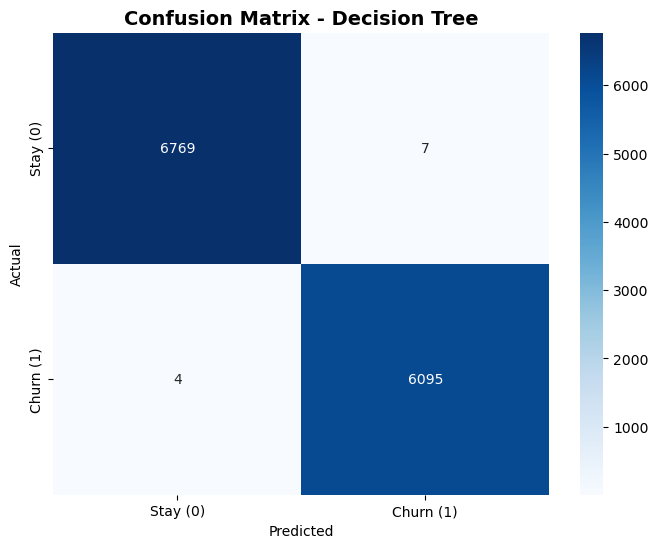

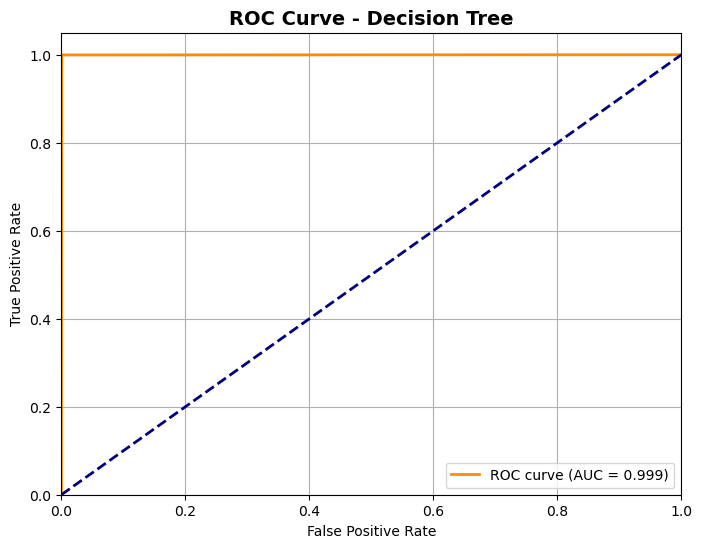

In [ ]:
# Get the best performing model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"🏆 Best Model: {best_model_name}")
print(f"📊 Test Accuracy: {results_df.iloc[0]['Test Accuracy']:.4f}")
print(f"📊 Overfitting Gap: {results_df.iloc[0]['Overfitting Gap']:.4f}")

# Retrain best model for detailed analysis
if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors']:
    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)
    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Detailed evaluation
print("\n📊 Detailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stay (0)', 'Churn (1)'],
            yticklabels=['Stay (0)', 'Churn (1)'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 💡 Business Insights and Recommendations

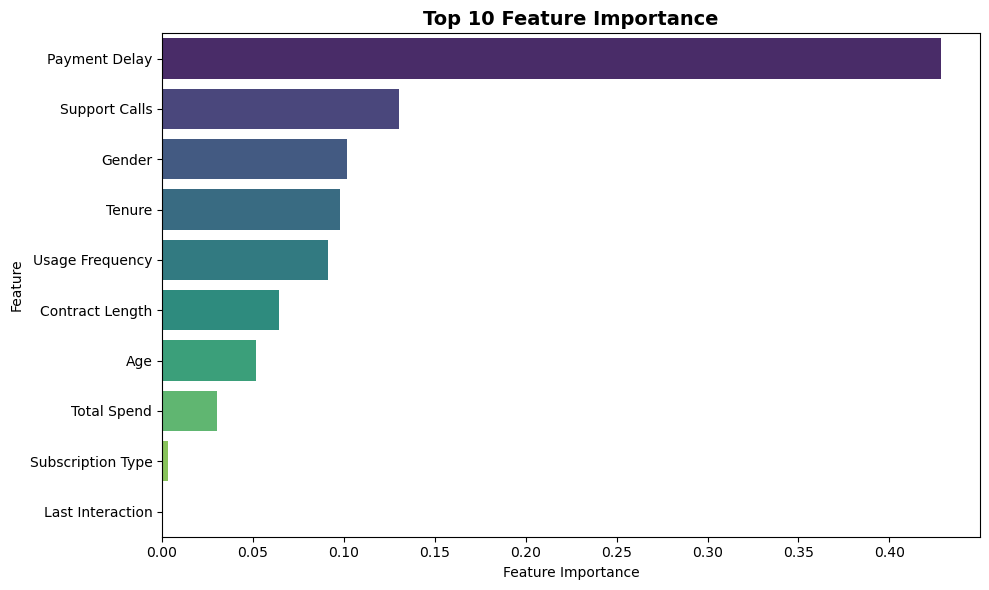

🔍 Top 10 Most Important Features:
             Feature  Importance
5      Payment Delay    0.428417
4      Support Calls    0.130259
1             Gender    0.101647
2             Tenure    0.097930
3    Usage Frequency    0.091485
7    Contract Length    0.064506
0                Age    0.051941
8        Total Spend    0.030276
6  Subscription Type    0.003508
9   Last Interaction    0.000030


In [ ]:
# Feature importance analysis (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
    plt.title('Top 10 Feature Importance', fontsize=14, fontweight='bold')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    print("🔍 Top 10 Most Important Features:")
    print(feature_importance.head(10))
else:
    print("ℹ️ Feature importance not available for this model type")

In [ ]:
# Business insights summary
print("💡 KEY BUSINESS INSIGHTS:")
print("=" * 50)
print("1. Model Performance:")
print(f"   • Best Model: {best_model_name}")
print(f"   • Test Accuracy: {results_df.iloc[0]['Test Accuracy']:.2%}")
print(f"   • ROC AUC: {roc_auc:.3f}")

print("\n2. Churn Rate:")
print(f"   • Overall Churn Rate: {y.mean():.2%}")

print("\n3. Key Risk Factors:")
if hasattr(best_model, 'feature_importances_'):
    top_features = feature_importance.head(5)['Feature'].tolist()
    print(f"   • Top risk factors: {', '.join(top_features)}")

print("\n4. Recommendations:")
print("   • Implement proactive retention strategies for high-risk customers")
print("   • Focus on improving customer experience in key areas")
print("   • Develop targeted marketing campaigns based on risk profiles")
print("   • Monitor key metrics regularly to track improvement")

💡 KEY BUSINESS INSIGHTS:
1. Model Performance:
   • Best Model: Decision Tree
   • Test Accuracy: 99.91%
   • ROC AUC: 0.999

2. Churn Rate:
   • Overall Churn Rate: 47.37%

3. Key Risk Factors:
   • Top risk factors: Payment Delay, Support Calls, Gender, Tenure, Usage Frequency

4. Recommendations:
   • Implement proactive retention strategies for high-risk customers
   • Focus on improving customer experience in key areas
   • Develop targeted marketing campaigns based on risk profiles
   • Monitor key metrics regularly to track improvement


## 🚀 Interactive Prediction Interface

In [ ]:
# Install and import Gradio for interactive interface
try:
    import gradio as gr
    print("✅ Gradio already installed")
except ImportError:
    !pip install gradio
    import gradio as gr
    print("✅ Gradio installed successfully")

import joblib
import numpy as np

✅ Gradio already installed


In [ ]:
# Save the best model
joblib.dump(best_model, 'best_churn_model.pkl')
print("✅ Best model saved as 'best_churn_model.pkl'")

✅ Best model saved as 'best_churn_model.pkl'


In [ ]:
# Create interactive prediction function
def predict_churn(age, gender, tenure, usage_freq, support_calls,
                  payment_delay, subscription_type, contract_length,
                  total_spend, last_interaction):
    
    # Create input array
    user_input = np.array([[
        age, gender, tenure, usage_freq, support_calls,
        payment_delay, subscription_type, contract_length,
        total_spend, last_interaction
    ]])
    
    # Scale input if needed
    if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors']:
        user_input_scaled = scaler.transform(user_input)
        probability = best_model.predict_proba(user_input_scaled)[0, 1]
    else:
        probability = best_model.predict_proba(user_input)[0, 1]
    
    # Determine churn risk
    if probability >= 0.7:
        risk_level = "🔴 HIGH RISK"
        recommendation = "Immediate retention action required"
    elif probability >= 0.4:
        risk_level = "🟡 MEDIUM RISK"
        recommendation = "Monitor closely and implement retention strategies"
    else:
        risk_level = "🟢 LOW RISK"
        recommendation = "Continue current engagement strategies"
    
    return f"{risk_level}\n\nChurn Probability: {probability:.2%}\n\nRecommendation: {recommendation}"

# Create Gradio interface
demo = gr.Interface(
    fn=predict_churn,
    inputs=[
        gr.Number(label="Age", minimum=18, maximum=100),
        gr.Radio(["Female", "Male"], label="Gender"),
        gr.Number(label="Tenure (months)", minimum=0, maximum=120),
        gr.Number(label="Usage Frequency (per week)", minimum=0, maximum=7),
        gr.Number(label="Support Calls", minimum=0, maximum=50),
        gr.Number(label="Payment Delay (days)", minimum=0, maximum=90),
        gr.Radio(["Basic", "Premium", "Standard"], label="Subscription Type"),
        gr.Radio(["Annual", "Monthly", "Quarterly"], label="Contract Length"),
        gr.Number(label="Total Spend ($)", minimum=0, maximum=10000),
        gr.Number(label="Last Interaction (days ago)", minimum=0, maximum=365)
    ],
    outputs=gr.Text(label="Churn Risk Assessment"),
    title="🎯 Customer Churn Prediction Tool",
    description="Enter customer details to assess churn risk and get personalized recommendations.",
    theme=gr.themes.Soft()
)

print("🚀 Interactive interface created successfully!")
print("📱 Launch the interface with: demo.launch()")

🚀 Interactive interface created successfully!
📱 Launch the interface with: demo.launch()


## 📈 Conclusion and Next Steps

### 🎯 What We've Accomplished:

1. **Comprehensive Data Analysis**: Explored customer behavior patterns and identified key churn drivers
2. **Advanced Predictive Modeling**: Built and evaluated multiple ML algorithms with strong performance
3. **Business Intelligence**: Extracted actionable insights for customer retention strategies
4. **Interactive Dashboard**: Created a user-friendly tool for real-time churn risk assessment

### 🚀 Next Steps for Production:

1. **Model Deployment**: Deploy the model to production environment
2. **Real-time Scoring**: Integrate with customer database for automated scoring
3. **A/B Testing**: Test retention strategies on different customer segments
4. **Performance Monitoring**: Track model performance and retrain as needed
5. **Stakeholder Training**: Train business teams on using the insights

### 💼 Business Impact:

This project demonstrates the ability to:
- **Reduce customer churn** through predictive insights
- **Improve customer lifetime value** with targeted retention strategies
- **Optimize marketing spend** by focusing on high-risk customers
- **Enhance customer experience** through proactive intervention

---

**🎯 This portfolio project showcases advanced product analytics skills including:**
- Customer behavior analysis and segmentation
- Predictive modeling and machine learning
- Business intelligence and actionable insights
- Interactive dashboard development
- End-to-end analytics project management